In [31]:
import pandas as pd 
import matplotlib.pyplot as plt  
import scipy.stats as st 
import numpy as np 
import datetime as dt 
import seaborn as sns

In [32]:
# read in the core data to use
# increase max number of columns and rows visible
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)
combined_df = pd.read_csv("../SB_files/all_listings_df")
combined_df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,NaN,1 bath,2.0,2.0,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1 shared bath,NaN,1.0,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,1 private bath,NaN,2.0,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [33]:
#explore the data file
combined_df.dtypes


id                                  int64
last_scraped                       object
description                        object
neighborhood_overview              object
host_id                             int64
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_listings_count                 int64
host_total_listings_count           int64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bathrooms_text                     object
bedrooms                          

In [34]:
combined_df.columns


Index(['id', 'last_scraped', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'price', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'city'],
      

In [35]:
#narrow down the file to be less columns for the host analysis
#specifically remove the following:  "last_scraped", "description", "neighborhood_overview", "latitude", "longitude", "bathrooms","bathrooms_text", "bedrooms", "beds", "reviews_per_month"
host_info_df = combined_df.drop(columns=["last_scraped", "description", "neighborhood_overview", "latitude", "longitude", "bathrooms","bathrooms_text", "bedrooms", "beds", "reviews_per_month"])
host_info_df.head()


,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,city
0,360,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,Entire guesthouse,Entire home/apt,3,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,Denver
1,364,783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,Entire loft,Entire home/apt,3,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,Denver
2,590,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,Private room in home,Private room,3,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,Denver
3,592,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,Private room in home,Private room,2,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,Denver
4,686,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,Private room in home,Private room,2,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,Denver


In [36]:
#explore the data
host_info_df.shape

(22851, 35)

In [37]:
host_info_df.dtypes

id                                  int64
host_id                             int64
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_listings_count                 int64
host_total_listings_count           int64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
price                             float64
has_availability                   object
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm             

In [38]:
#core question to answer is What impacts a quality host? some ideas to explore below -first are elements about the host correlated with the rating?
#Host neighborhood vs. listing neighborhood - if host doesn’t live in neighborhood with listing, is there correlation with rating or usage?

#Type of host (superhost or no)
#Length of time being a host
#Volume of descriptive text about the property
#Number of reviews


In [39]:
# identify if any host columns are missing data

# Check for null values in each column
null_values = host_info_df.isnull().sum()

# Filter out columns with null values
columns_with_null = null_values[null_values > 0]

# Display the columns with null values
print("Columns with null values:\n", columns_with_null)


Columns with null values:
 host_location                  3965
host_response_time             2231
host_response_rate             2231
host_acceptance_rate           1741
host_is_superhost               558
review_scores_rating           3530
review_scores_accuracy         3546
review_scores_cleanliness      3545
review_scores_checkin          3547
review_scores_communication    3545
review_scores_location         3547
review_scores_value            3547
dtype: int64


In [40]:
#should I do a percentage fill rate for each of the columns? 
fill_percentage = (1 - (null_values / len(host_info_df))) * 100

# Display the fill percentage for each column
print("Fill percentage for each column:\n", fill_percentage)

Fill percentage for each column:
 id                                100.000000
host_id                           100.000000
host_since                        100.000000
host_location                      82.648462
host_response_time                 90.236751
host_response_rate                 90.236751
host_acceptance_rate               92.381077
host_is_superhost                  97.558094
host_listings_count               100.000000
host_total_listings_count         100.000000
host_has_profile_pic              100.000000
host_identity_verified            100.000000
neighbourhood_cleansed            100.000000
property_type                     100.000000
room_type                         100.000000
accommodates                      100.000000
price                             100.000000
has_availability                  100.000000
availability_30                   100.000000
availability_60                   100.000000
availability_90                   100.000000
availability_365     

In [41]:
host_info_cleaned_df= host_info_df.dropna(how="any")
host_info_cleaned_df.count()

id                                14363
host_id                           14363
host_since                        14363
host_location                     14363
host_response_time                14363
host_response_rate                14363
host_acceptance_rate              14363
host_is_superhost                 14363
host_listings_count               14363
host_total_listings_count         14363
host_has_profile_pic              14363
host_identity_verified            14363
neighbourhood_cleansed            14363
property_type                     14363
room_type                         14363
accommodates                      14363
price                             14363
has_availability                  14363
availability_30                   14363
availability_60                   14363
availability_90                   14363
availability_365                  14363
number_of_reviews                 14363
number_of_reviews_ltm             14363
number_of_reviews_l30d            14363


In [42]:
print(host_info_cleaned_df.isnull().sum())


id                                0
host_id                           0
host_since                        0
host_location                     0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
price                             0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness   

In [43]:
##how many unique hosts do we have?
number_of_hosts = host_info_cleaned_df["host_id"].nunique()
print(f"number of hosts in our 2023 data is: {number_of_hosts}")

number of hosts in our 2023 data is: 7592


In [44]:
number_hosts_by_city = host_info_cleaned_df.groupby("city")["host_id"].count()
number_hosts_by_city

city
Boston       2137
Denver       3417
Nashville    5625
Portland     3184
Name: host_id, dtype: int64

In [45]:
#how many listings do we have?
number_listings = host_info_cleaned_df["id"].nunique()
print(f"number of listings in our 2023 is: {number_listings}")

number of listings in our 2023 is: 14363


In [46]:
#average number of listings per host? 
average_listing_per_host = host_info_cleaned_df.groupby("city")["host_listings_count"].mean()
average_listing_per_host.head()

city
Boston       198.882546
Denver        96.908399
Nashville     62.094400
Portland      22.074121
Name: host_listings_count, dtype: float64

In [47]:
average_listing_per_host = pd.pivot_table(host_info_cleaned_df,
                                          values= "host_listings_count",
                                          columns = "city",
                                          aggfunc= "mean")

#rename to reflect average number of listings and round the value to one decimal
average_listing_per_host.rename(index={"host_listings_count": "avg_number_listings"}).round(1)

city,Boston,Denver,Nashville,Portland
avg_number_listings,198.9,96.9,62.1,22.1


In [48]:
#what is average amount of time hosts have been hosts?
# Convert 'host_since' column to datetime
host_info_cleaned_df['host_since'] = pd.to_datetime(host_info_cleaned_df['host_since'])

# Calculate the length of time in years and create a column for this value
host_info_cleaned_df['hosting_years'] = (pd.to_datetime('now') - host_info_cleaned_df['host_since']).dt.days/365.25

# Calculate the average hosting duration in years
average_hosting_years = host_info_cleaned_df['hosting_years'].mean()

# Display the result
print("Average hosting duration in years:", average_hosting_years)

Average hosting duration in years: 7.654097914812009


/var/folders/jj/dm8tbcj11273_w688qyz4jmh0000gp/T/ipykernel_96151/358904173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_info_cleaned_df['host_since'] = pd.to_datetime(host_info_cleaned_df['host_since'])
/var/folders/jj/dm8tbcj11273_w688qyz4jmh0000gp/T/ipykernel_96151/358904173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_info_cleaned_df['hosting_years'] = (pd.to_datetime('now') - host_info_cleaned_df['host_since']).dt.days/365.25


In [49]:
host_info_cleaned_df = host_info_cleaned_df     

In [50]:
host_info_cleaned_df.columns

Index(['id', 'host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'price', 'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'city', 'hosting_years'],
      dtype='object')

In [51]:
average_hosting_years_city = host_info_cleaned_df.groupby("city")[["hosting_years"]].mean()
average_hosting_years_city.head()

,hosting_years
city,
Boston,7.739973
Denver,7.779174
Nashville,7.016273
Portland,8.589042


In [52]:
#does number of years hosting correlate with higher ratings?
#create new df with subset of columns
years_to_rating= pd.DataFrame(host_info_cleaned_df[["id","host_id", "hosting_years", "review_scores_rating", "city"]])
years_to_rating.set_index("id", inplace=True)
years_to_rating.head()

,host_id,hosting_years,review_scores_rating,city
id,,,,
360,666,15.493498,4.99,Denver
590,933,15.457906,4.85,Denver
592,933,15.457906,4.87,Denver
686,990,15.452430,4.76,Denver
1940,2150,15.386721,4.95,Denver


/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sonjambaro/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

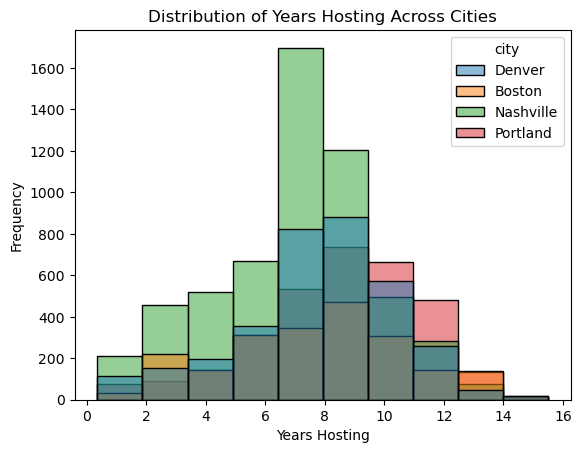

In [60]:
#What is the distribution of years hosting across our data set?
sns.histplot(host_info_cleaned_df, x='hosting_years', hue= 'city', bins=10, kde=False)
plt.title('Distribution of Years Hosting Across Cities')
plt.xlabel('Years Hosting')
plt.ylabel('Frequency')
plt.show()


In [53]:
no_city_yrs_review = years_to_rating.drop(columns="city")
no_city_yrs_review.head()

,host_id,hosting_years,review_scores_rating
id,,,
360,666,15.493498,4.99
590,933,15.457906,4.85
592,933,15.457906,4.87
686,990,15.452430,4.76
1940,2150,15.386721,4.95


In [54]:
#is there a corr betweenhosting years and review scores?
years_to_rating_review = no_city_yrs_review.corr()
years_to_rating_review.unstack().sort_values()
#duration of hosting doesn't appear to influence the review scores rating

host_id               hosting_years          -0.932432
hosting_years         host_id                -0.932432
host_id               review_scores_rating   -0.081184
review_scores_rating  host_id                -0.081184
hosting_years         review_scores_rating    0.065972
review_scores_rating  hosting_years           0.065972
host_id               host_id                 1.000000
hosting_years         hosting_years           1.000000
review_scores_rating  review_scores_rating    1.000000
dtype: float64

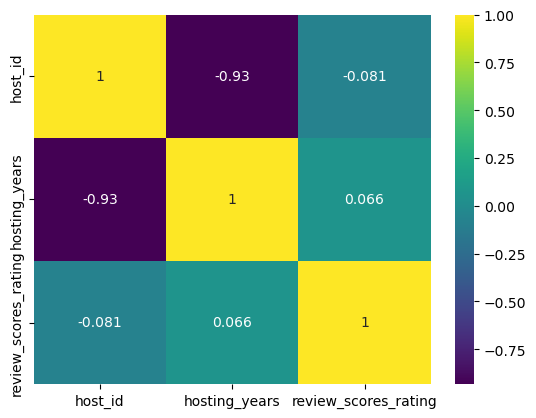

In [59]:
corr = no_city_yrs_review.corr()
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()



In [56]:
#now look at the responsiveness of the host to the rating
response_to_rating= pd.DataFrame(host_info_cleaned_df[["id","host_id", "host_response_time", "review_scores_rating", "city"]])
response_to_rating.set_index("id", inplace=True)
response_to_rating.head()

,host_id,host_response_time,review_scores_rating,city
id,,,,
360,666,within an hour,4.99,Denver
590,933,within an hour,4.85,Denver
592,933,within an hour,4.87,Denver
686,990,within a few hours,4.76,Denver
1940,2150,within an hour,4.95,Denver


In [57]:
#we could look at converting the host_reponse time to a scale in order to give it a numeric value if we wanted to do a correlation?

In [58]:
response_corr = response_to_rating.corr()


ValueError: could not convert string to float: 'within an hour'